In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("..\datasets\diabetes.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

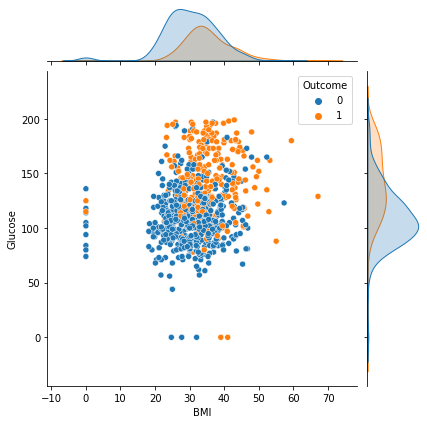

In [4]:
sns.jointplot(x='BMI',y='Glucose',data=df,hue='Outcome')
plt.show()

In [5]:
# sns.pairplot(data=df, hue='Outcome',)

In [6]:
X=df[['BMI','Glucose']]
y=df['Outcome']

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
scale=StandardScaler()
x=scale.fit_transform(X)

In [9]:
xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=.2,random_state=0)

In [10]:
m1=LogisticRegression()
m2=DecisionTreeClassifier()
m3=KNeighborsClassifier()
m4=SVC(kernel='linear')

In [11]:
m1.fit(xtrain,ytrain)
m2.fit(xtrain,ytrain)
m3.fit(xtrain,ytrain)
m4.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
ypredLin=m1.predict(X)
ypredDec=m2.predict(X)
ypredKnn=m3.predict(X)
ypredsvc=m4.predict(X)

In [13]:
print("Logistic Regression\n",confusion_matrix(y,ypredLin))
print("Decision Tree\n",confusion_matrix(y,ypredDec))
print("KNN\n",confusion_matrix(y,ypredKnn))
print("SVC\n",confusion_matrix(y,ypredsvc))

Logistic Regression
 [[449  51]
 [133 135]]
Decision Tree
 [[470  30]
 [ 26 242]]
KNN
 [[429  71]
 [102 166]]
SVC
 [[449  51]
 [129 139]]


In [14]:
print(f'{"--"*20}Logistic Regression{"--"*20}')
print(classification_report(y,ypredLin))
print(f'{"--"*20}Decision Tree{"--"*20}')
print(classification_report(y,ypredDec))
print(f'{"--"*20}KNN{"--"*20}')
print(classification_report(y,ypredKnn))
print(f'{"--"*20}SVC{"--"*20}')
print(classification_report(y,ypredsvc))

----------------------------------------Logistic Regression----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       500
           1       0.73      0.50      0.59       268

    accuracy                           0.76       768
   macro avg       0.75      0.70      0.71       768
weighted avg       0.76      0.76      0.75       768

----------------------------------------Decision Tree----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       500
           1       0.89      0.90      0.90       268

    accuracy                           0.93       768
   macro avg       0.92      0.92      0.92       768
weighted avg       0.93      0.93      0.93       768

----------------------------------------KNN----------------------------------------
              precision    recall  f1-score   support

           0 

In [15]:
df['predsvc'] = ypredsvc
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,predsvc
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


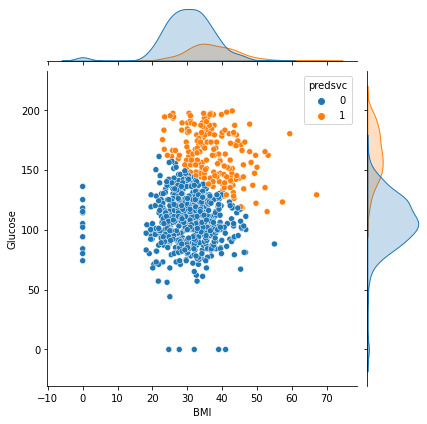

In [16]:
sns.jointplot(x='BMI',y='Glucose',hue='predsvc',data=df)

In [17]:
px.scatter_3d(df,x='Age',y='SkinThickness',z='Insulin',color='Outcome')

In [18]:
X = df[['Age','SkinThickness','Insulin']]
y = df['Outcome']

In [19]:
scaled = StandardScaler()
x = scaled.fit_transform(X)

In [20]:
xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=.2,random_state=0)

In [31]:
model1 = SVC(kernel='linear')
model2 = DecisionTreeClassifier()

In [32]:
model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
ypredS = model1.predict(X)
ypredT = model2.predict(X)

In [36]:
print("SVM\n",confusion_matrix(y,ypredS))
print("tree\n",confusion_matrix(y,ypredT))

SVM
 [[500   0]
 [268   0]]
tree
 [[452  48]
 [ 60 208]]


In [39]:
print(f'{"--"*20}SVM{"--"*20}')
print(classification_report(y,ypredS))
print(f'{"--"*20}Tree{"--"*20}')
print(classification_report(y,ypredT))

----------------------------------------SVM----------------------------------------
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       500
           1       0.00      0.00      0.00       268

    accuracy                           0.65       768
   macro avg       0.33      0.50      0.39       768
weighted avg       0.42      0.65      0.51       768

----------------------------------------Tree----------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       500
           1       0.81      0.78      0.79       268

    accuracy                           0.86       768
   macro avg       0.85      0.84      0.84       768
weighted avg       0.86      0.86      0.86       768



In [40]:
df['predSVC'] = ypredS

In [43]:
# sns.jointplot(x='BMI',y='Glucose',hue='predSVS',data=df)
px.scatter_3d(df,x='Age',y='SkinThickness',z='Insulin',color='predSVC')